In [1]:
import pandas as pd

In [23]:
import math

In [2]:
import pprint

In [3]:
import random

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
 from sklearn.decomposition import PCA

In [6]:
import numpy as np

In [7]:
import matplotlib as ml
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv("data/FINAL_ALL_SEQUENCES_TRAINTEST.tsv", sep = '\t')

In [46]:
k = data['SEQUENCE'].tolist()
listClientS = []
for n in k:
    listClientS.append(eval(n))
print(listClientS[0])

['e84b0f471b8e8f4aecc81eb27b16c092', '9a7670be67a118ddd4b30f5cdd3b035e', 'e65bd9b13ec4a97ac7b912f37c3e36d4', 'aeb4b083a0762ecba2222942ab6b7e22', '23114079654c0224e07fe90619744944', 'f150c479778accab9c439eefe6bd22b4', 'eb727f972742f7ff6b07ee761ae5da1b', '41d71f48089e26dcf46e86474f3568b1', 'db67edba557aecc4435c3bdca5c25d5f', '393a7e7006bb3c2470a93c67429b8d2c', '9cb3abf65fd1465b1c8f829a73761f56', 'eb727f972742f7ff6b07ee761ae5da1b', 'd48a3ba9247bc34d3ef617cb5cb9c5e5', 'acb4ac11bd962f9a3e05042e5b1a260a', 'd8d8278d044dee0fdf62f12708b7fb7b', 'eb727f972742f7ff6b07ee761ae5da1b', '468e25839a56ee5706895fcbb8f5aa00', '179a7187f9dbf227e3751608d6796319', 'd107595edd990ec01718897044bf78ba', '123ce1d2bea3cf5e381ef706605b5aaa', 'eb727f972742f7ff6b07ee761ae5da1b', 'aeb4b083a0762ecba2222942ab6b7e22', 'd48a3ba9247bc34d3ef617cb5cb9c5e5', '5b47ea7718d6194ed6049085bd4c747f', 'c82c51bc925071ff17983d79b472c9f8', 'eb727f972742f7ff6b07ee761ae5da1b', '179a7187f9dbf227e3751608d6796319', 'eb727f972742f7ff6b07ee761a

In [16]:
data.isna().sum()

CLIENT_ID    0
SEQUENCE     0
dtype: int64

In [48]:
dataFriends = pd.read_csv("data/FINAL_FEATURES_FRIENDS.tsv", sep = '\t')

In [52]:
dataFriends.shape

(1128689, 1016)

In [51]:
dataFriends.nunique()

CLIENT_ID      14692
i1047             89
i1048           1223
i1056           3949
i1058            623
              ...   
u8=6              14
u8=7               6
u8=8              22
u8=9             114
FRIEND_ID    1128688
Length: 1016, dtype: int64

In [163]:
head = list(dataFriends.head(0))
head = head[1:len(head) - 1]
listFeature = (dataFriends[head[0]].tolist())
dataDiagram = []
for word in head:
    datas = []
    listFeature = (dataFriends[word].tolist())
    datas.append(min(listFeature))
    datas.append(max(listFeature))
    datas.append(sum(listFeature)/len(listFeature))
    datas.append(np.unique(listFeature).shape[0])
    dataDiagram.append(datas)
dataDiagram = np.array(dataDiagram)
print(dataDiagram)

[[0.00000000e+00 3.62000000e+02 2.42697501e-02 8.90000000e+01]
 [0.00000000e+00 8.31500000e+03 9.53076002e+00 1.22300000e+03]
 [0.00000000e+00 1.03667000e+05 6.56170575e+01 3.94900000e+03]
 ...
 [0.00000000e+00 9.00000000e+00            nan 7.00000000e+00]
 [0.00000000e+00 5.14000000e+02            nan 2.30000000e+01]
 [0.00000000e+00 4.35680000e+04            nan 1.15000000e+02]]


In [78]:
print(len(dataDiagram[:,0]))
print(len(list(dataFriends.head(0))))

1014
1016
Empty DataFrame
Columns: [CLIENT_ID, i1047, i1048, i1056, i1058, i1059, i1060, i1065, i1066, i1067, i1068, i1070, i1073, i1074, i1075, i1077, i1079, i1092, i1095, i1097, i1130, i1139, i1147, i1169, i1193, i1205, i1214, i1225, i1228, i1246, i1248, i1256, i1262, i1270, i1280, i1287, i1297, i1299, i1328, i1332, i1339, i1342, i1343, i1344, i1345, i1346, i1347, i1352, i1353, i1355, i1357, i1360, i1361, i1363, i1364, i1375, i1386, i1387, i1392, i1393, i1411, i1427, i1431, i1438, i1442, i1447, i1449, i1457, i1460, i1462, i1463, i1465, i1466, i1474, i1476, i1477, i1480, i1481, i1485, i1494, i1496, i1502, i1503, i1504, i1505, i1506, i1507, i1508, i1509, i1510, i1511, i1512, i1513, i1514, i1515, i1516, i1517, i1518, i1519, i1520, ...]
Index: []

[0 rows x 1016 columns]


(array([   0.,    0.,    0.,    0.,    0., 1014.,    0.,    0.,    0.,
           0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

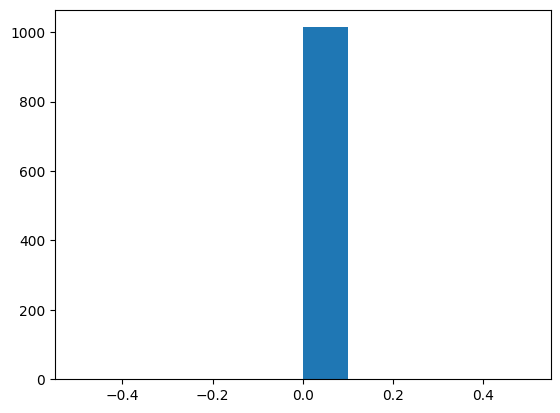

In [67]:
plt.hist(dataDiagram[:,0])

(array([960.,  32.,   7.,   3.,   1.,   6.,   0.,   0.,   1.,   4.]),
 array([1.0000000e+00, 1.0413035e+06, 2.0826060e+06, 3.1239085e+06,
        4.1652110e+06, 5.2065135e+06, 6.2478160e+06, 7.2891185e+06,
        8.3304210e+06, 9.3717235e+06, 1.0413026e+07]),
 <BarContainer object of 10 artists>)

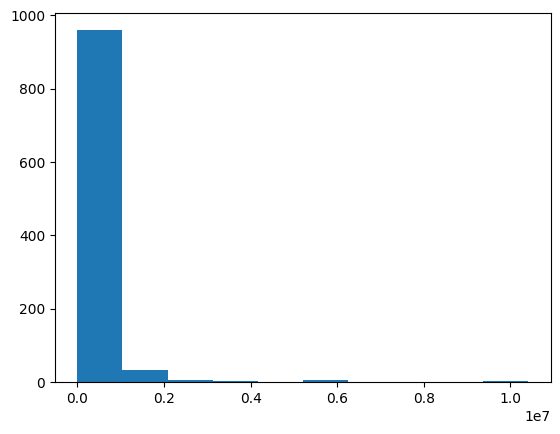

In [72]:
plt.hist(dataDiagram[:,1])

(array([908.,   7.,   4.,   2.,   0.,   0.,   0.,   1.,   0.,   2.]),
 array([3.72113133e-05, 2.81850174e+03, 5.63700345e+03, 8.45550516e+03,
        1.12740069e+04, 1.40925086e+04, 1.69110103e+04, 1.97295120e+04,
        2.25480137e+04, 2.53665154e+04, 2.81850171e+04]),
 <BarContainer object of 10 artists>)

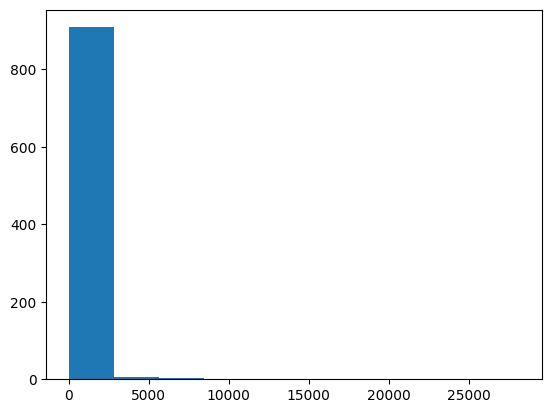

In [73]:
plt.hist(dataDiagram[:,2])

(array([969.,  21.,   7.,   4.,   6.,   2.,   2.,   0.,   1.,   2.]),
 array([3.000000e+00, 1.412730e+04, 2.825160e+04, 4.237590e+04,
        5.650020e+04, 7.062450e+04, 8.474880e+04, 9.887310e+04,
        1.129974e+05, 1.271217e+05, 1.412460e+05]),
 <BarContainer object of 10 artists>)

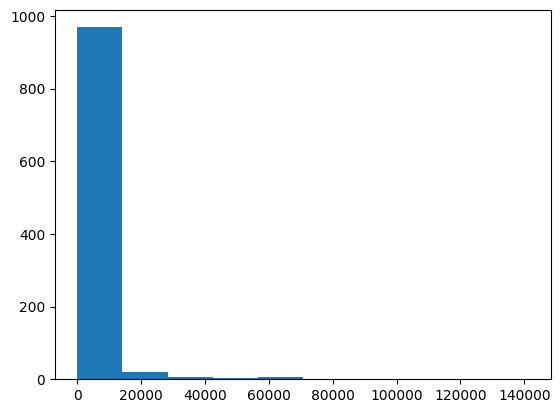

In [164]:
plt.hist(dataDiagram[:,3])

In [21]:
sorted(dataFriends.isna().sum(), reverse = True)

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [16]:
dataFatures = pd.read_csv("data/FINAL_FEATURES_TRAINTEST.tsv", sep = '\t')

In [27]:
head = list(dataFatures.head(0))
head = head[1:len(head)]
dataDiagram = []
for word in head:
    listFeature = (dataFatures[word].tolist())
    datas = [x for x in listFeature if not math.isnan(x)]
    dataDiagram.append(np.mean(datas))
dataDiagram = np.array(dataDiagram)
print(dataDiagram)

[2.38564412e-02 7.50897742e+00 5.61716563e+01 ... 0.00000000e+00
 5.00140039e-04 6.42880006e-02]


In [160]:
x = random.randint(0,1000)
print(x)
dataFatures[head[x]].value_counts()

389


0.0      96893
1.0        801
2.0        784
4.0        326
3.0        305
         ...  
67.0         1
96.0         1
99.0         1
179.0        1
141.0        1
Name: i793, Length: 83, dtype: int64

(array([   0.,    0.,    0.,    0.,    0., 1014.,    0.,    0.,    0.,
           0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

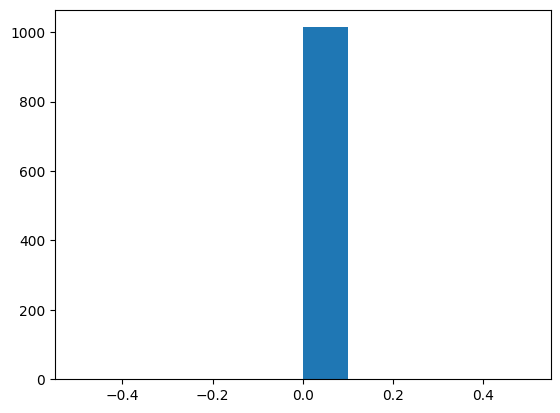

In [86]:
plt.hist(dataDiagram[:,0])

(array([942.,  29.,  16.,  13.,   4.,   1.,   1.,   5.,   0.,   3.]),
 array([      0. ,  256389.2,  512778.4,  769167.6, 1025556.8, 1281946. ,
        1538335.2, 1794724.4, 2051113.6, 2307502.8, 2563892. ]),
 <BarContainer object of 10 artists>)

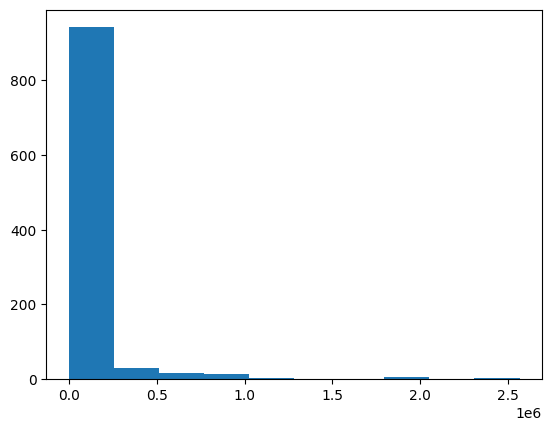

In [87]:
plt.hist(dataDiagram[:,1])

(array([309.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([3.30089124e-04, 2.58176574e+02, 5.16352817e+02, 7.74529061e+02,
        1.03270530e+03, 1.29088155e+03, 1.54905779e+03, 1.80723404e+03,
        2.06541028e+03, 2.32358652e+03, 2.58176277e+03]),
 <BarContainer object of 10 artists>)

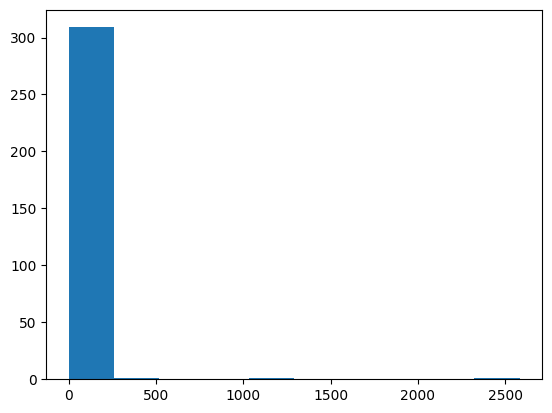

In [88]:
 plt.hist(dataDiagram[:,2])

(array([971.,  20.,   4.,   6.,   6.,   3.,   1.,   0.,   1.,   2.]),
 array([2.00000e+00, 4.24510e+03, 8.48820e+03, 1.27313e+04, 1.69744e+04,
        2.12175e+04, 2.54606e+04, 2.97037e+04, 3.39468e+04, 3.81899e+04,
        4.24330e+04]),
 <BarContainer object of 10 artists>)

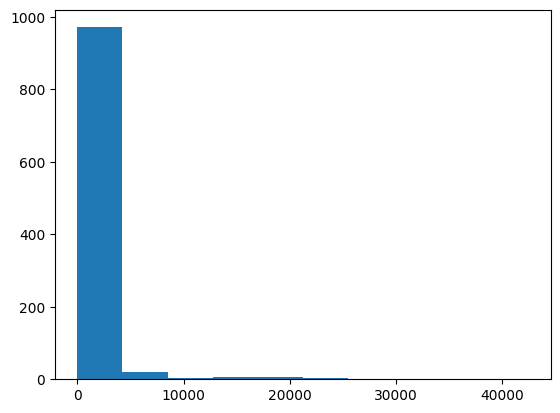

In [166]:
plt.hist(dataDiagram[:,3])

In [9]:
dataSeqMat =  pd.read_csv("data/FINAL_SEQUENCES_MATRIX.csv", sep = '\t')

In [10]:
dataTarget =  pd.read_csv("data/FINAL_TARGETS_DATES_TRAINTEST.tsv", sep = '\t')

In [14]:
dataFinalAll = pd.read_csv("data/FINAL_ALL_SEQUENCES_TRAINTEST.tsv", sep = '\t')

In [38]:
dataClient = dataFinalAll.merge(dataTarget, how = "left", on = "CLIENT_ID")

In [39]:
dataClient.head()

,CLIENT_ID,SEQUENCE,RETRO_DT,TARGET
0,1000100,"['e84b0f471b8e8f4aecc81eb27b16c092', '9a7670be...",20210512,0
1,1000121,"['9804a8d70c5e8c26830bdafe2c2db49c', '9ca02fb0...",20210603,test
2,1000131,"['b496d19eb25556bd64e481d11b6f7dd6', 'eb727f97...",20210613,0
3,1000132,"['467a38fe36ef666e264823387f66f3c8', 'e0494409...",20210601,1
4,100013,"['b496d19eb25556bd64e481d11b6f7dd6', 'fc18cab3...",20210601,test


In [43]:
dataClient1 = dataClient[dataClient["TARGET"] == "1"]

In [45]:
dataClient0 = dataClient[dataClient["TARGET"] == "0"]

In [44]:
dataClient1.head()

,CLIENT_ID,SEQUENCE,RETRO_DT,TARGET
3,1000132,"['467a38fe36ef666e264823387f66f3c8', 'e0494409...",20210601,1
5,1000225,"['b8f6a6a0766163b13ee6b74febd534c9', '1669b50f...",20210530,1
8,1000596,"['81add802f34fbb359f339f657b9f6ed1', 'efa37b56...",20210619,1
12,1001029,"['91270c5e5a93f9fe369df99241ff2e7e', 'b496d19e...",20210627,1
17,1001412,"['5444e41128ef478f9e077e67f5513a3c', 'e65bd9b1...",20210621,1


In [64]:
dataSeq = dataClient1["SEQUENCE"]
counts = []
for datac in dataSeq:
    counts.append(eval(datac))
countTop = np.concatenate(np.array(counts))
unique, counts= np.unique(countTop, return_counts=True)
top1 = dict(zip(unique, counts))
top1 = dict(sorted(top1.items(), key=lambda x: x[1], reverse = True))

/tmp/ipykernel_113091/3875278245.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  countTop = np.concatenate(np.array(counts))


In [65]:
dataSeq = dataClient0["SEQUENCE"]
counts = []
for datac in dataSeq:
    counts.append(eval(datac))
countTop = np.concatenate(np.array(counts))
unique, counts= np.unique(countTop, return_counts=True)
top0 = dict(zip(unique, counts))
top0 = dict(sorted(top0.items(), key=lambda x: x[1], reverse = True))

/tmp/ipykernel_113091/381084214.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  countTop = np.concatenate(np.array(counts))


In [66]:
datFrame1 = pd.DataFrame(top1.items()) 

In [68]:
datFrame1.head()

,0,1
0,eb727f972742f7ff6b07ee761ae5da1b,748820
1,d08c1bbf135ff7e0c8324fbc890e9916,178234
2,87a4ccc2101bb6109d397e91e9291624,177893
3,c82c51bc925071ff17983d79b472c9f8,176364
4,b496d19eb25556bd64e481d11b6f7dd6,137105


In [70]:
datFrame0 =  pd.DataFrame(top0.items()) 

In [71]:
datFrame0.head()

,0,1
0,eb727f972742f7ff6b07ee761ae5da1b,2130352
1,87a4ccc2101bb6109d397e91e9291624,525847
2,d08c1bbf135ff7e0c8324fbc890e9916,525532
3,c82c51bc925071ff17983d79b472c9f8,518796
4,b496d19eb25556bd64e481d11b6f7dd6,393330


In [74]:
datFrame01 = datFrame0.merge(datFrame1, how = "left", on = 0)

In [82]:
datFrame01 = datFrame01.fillna(0)

In [79]:
from scipy import stats
#res = stats.pearsonr([1, 2, 3, 4, 5], [10, 9, 2.5, 6, 4])

In [83]:
list1 = list(datFrame01["1_x"])
list2 = list(datFrame01["1_y"])
stats.pearsonr(list1,list2)

PearsonRResult(statistic=0.9992711150993162, pvalue=0.0)

In [9]:
dataTarget =  pd.read_csv("data/FINAL_TARGETS_DATES_TRAINTEST.tsv", sep = '\t')

In [13]:
dataFriends.head()

,CLIENT_ID,i1047,i1048,i1056,i1058,i1059,i1060,i1065,i1066,i1067,...,u8=18,u8=19,u8=2,u8=20,u8=21,u8=6,u8=7,u8=8,u8=9,FRIEND_ID
0,999819,0.0,0.0,8.0,1.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99981973.0
1,999819,0.0,45.0,41.0,0.0,18.0,2.0,17.0,0.0,6.0,...,0.0,29.0,0.0,0.0,133.0,0.0,0.0,0.0,0.0,99981949.0
2,999819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99981979.0
3,999819,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99981939.0
4,999819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99981975.0


In [18]:
sub = dataFriends["CLIENT_ID"]

In [26]:
friendsList = dict(sub.value_counts())

In [31]:
pprint.pprint(friendsList)

{7150: 100,
 7154: 21,
 7156: 1,
 26966: 100,
 26993: 100,
 26995: 100,
 26996: 100,
 27004: 61,
 27007: 100,
 27012: 100,
 29378: 100,
 29401: 81,
 29414: 100,
 29449: 9,
 29459: 100,
 29460: 21,
 29476: 100,
 29522: 73,
 29523: 85,
 29549: 100,
 29550: 43,
 29557: 35,
 29577: 100,
 29579: 73,
 29580: 66,
 29607: 7,
 29624: 100,
 29626: 100,
 29627: 100,
 29628: 100,
 29642: 100,
 29644: 93,
 29650: 89,
 30524: 100,
 30530: 99,
 30531: 9,
 30533: 60,
 30693: 100,
 30694: 100,
 30700: 75,
 30711: 100,
 30716: 86,
 30718: 72,
 30719: 100,
 31215: 100,
 31232: 35,
 31233: 100,
 31236: 100,
 32922: 12,
 32923: 100,
 33080: 24,
 33086: 72,
 33100: 62,
 34996: 100,
 34997: 100,
 35004: 100,
 35282: 100,
 35285: 100,
 35287: 12,
 35291: 36,
 35441: 73,
 35445: 29,
 35447: 100,
 35449: 7,
 35450: 100,
 35452: 100,
 36958: 100,
 36981: 100,
 36983: 100,
 36986: 24,
 36987: 69,
 37055: 48,
 37063: 67,
 37064: 100,
 37069: 29,
 37071: 99,
 37073: 23,
 37130: 15,
 37131: 100,
 37138: 100,
 37158:

In [35]:
data0Target = dataTarget[dataTarget["TARGET"] == "0"]["CLIENT_ID"].tolist()
data1Target = dataTarget[dataTarget["TARGET"] == "1"]["CLIENT_ID"].tolist()

In [41]:

zeroStatistic = []
for x in data0Target:
    try:
        zeroStatistic.append(friendsList[x]) 
    except KeyError as e:
        pass

oneStatistic = []
for x in data1Target:
    try:
        oneStatistic.append(friendsList[x]) 
    except KeyError as e:
        pass

(array([ 591.,  340.,  359.,  332.,  341.,  341.,  350.,  327.,  328.,
        4954.]),
 array([  1. ,  10.9,  20.8,  30.7,  40.6,  50.5,  60.4,  70.3,  80.2,
         90.1, 100. ]),
 <BarContainer object of 10 artists>)

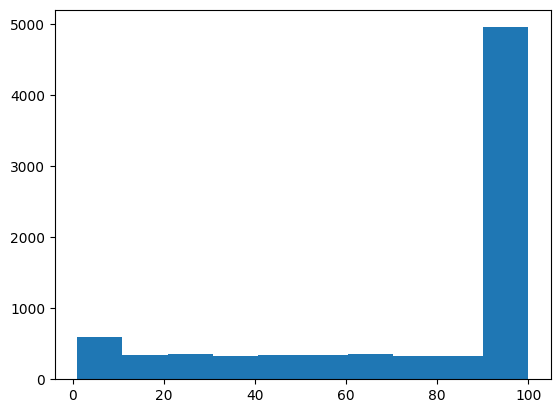

In [45]:
plt.hist(zeroStatistic)

(array([ 224.,  124.,  143.,  161.,  147.,  139.,  141.,  148.,  143.,
        2060.]),
 array([  1. ,  10.9,  20.8,  30.7,  40.6,  50.5,  60.4,  70.3,  80.2,
         90.1, 100. ]),
 <BarContainer object of 10 artists>)

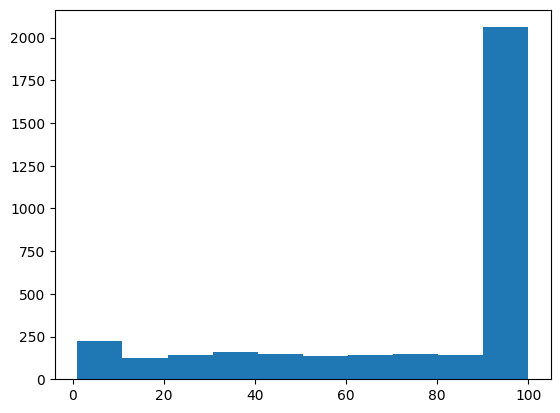

In [44]:
plt.hist(oneStatistic)